
### To enhance momepy with support for Street-Based Tessellation (ST), the goal would be to enable more nuanced, street-network-based tessellation rather than relying purely on spatial proximity. Here's an example of how you could start implementing this enhancement using networkx for street network analysis and modifying tessellation logic in momepy:

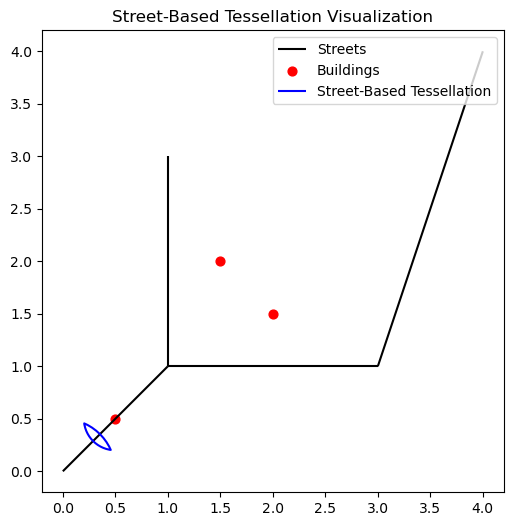

In [3]:
import geopandas as gpd
import momepy
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, Point

# Create a GeoDataFrame 'streets' to represent the street network.
streets = gpd.GeoDataFrame(
    {"geometry": [LineString([(0, 0), (1, 1)]), LineString([(1, 1), (1, 3)]),
                  LineString([(1, 1), (3, 1)]), LineString([(3, 1), (4, 4)])]}
)   # Each geometry is a LineString defining the coordinates of a street segment.

# Create another GeoDataFrame 'buildings' to represent buildings.
buildings = gpd.GeoDataFrame(
    {"geometry": [Point(0.5, 0.5), Point(2, 1.5), Point(1.5, 2)]}
)

# Initialize an empty graph 'G' using networkx to represent the street network as nodes and edges.
G = nx.Graph()
for idx, street in streets.iterrows():  # Loop through each street in 'streets'
    coords = list(street.geometry.coords)   # Extract its coordinates
    for i in range(len(coords) - 1):       # Iterate over consecutive pairs of coordinates
        G.add_edge(coords[i], coords[i + 1], weight=1)  # Add edges with weight = 1

# Function for street-based teessellation
def street_based_tessellation(buildings, G):
    tessellation_geoms = []     # Store the generated polygons
    for idx, building in buildings.iterrows():     # Loop through each building
        building_point = building.geometry     # Get the building's location (Point object)
        # Find the nearest street node
        nearest_node = min(G.nodes, key=lambda node: building_point.distance(Point(node)))
        # Generate a polygon around the building and the nearest node (example logic)
        buffer_polygon = building_point.buffer(0.3)
        network_polygon = Point(nearest_node).buffer(0.5)
        tessellation_geoms.append(buffer_polygon.intersection(network_polygon))
    return gpd.GeoDataFrame({"geometry": tessellation_geoms})

# Generate tessellation
tessellation = street_based_tessellation(buildings, G)

# Plot results
fig, ax = plt.subplots(figsize=(8, 6))
streets.plot(ax=ax, color="black", label="Streets")
buildings.plot(ax=ax, color="red", markersize=40, label="Buildings")
tessellation.boundary.plot(ax=ax, color="blue", label="Street-Based Tessellation")
ax.legend()
plt.title("Street-Based Tessellation Visualization")
plt.show()
